## <span style="color:blue"> Computer Vision - Winter 2024

## <span style="color:blue"> Exercise 3 </span>
**Reichman University**

**Lecturer:** Prof. Yael Moses, RUNI

**TA:** Eyal Friedman, RUNI

    
    
**Submission date: 9.2.24** \
Note: In case you need an extension for any reason, you can submit it by 14.2.24. \
No extra extensions will be given.
In case you are in miluim - please contact Yael directly.

**Your name: Orr Zwebner, Gidon Bonwit**
**Your ID: 203253422, 307920942**

In this exercise, you will practice projection matrices and epipolar geometry related tasks.



## <span style="color:blue"> Submission guidelines:</span>

1. Your **zip** file should include the following files only:
   - ex3.ipynb
   - images you use that were not given 
2. You should use Jupyter Notebook.
3. Name the zip file **'ex3_ID_ID.zip'** and **do not** include any additional directories.
4. Submit using *Moodle*.
5. Submit on time!
6. You can submit this assignment in pairs (no triplets).
   * In the case of pair submission, both IDs and names should be added to the notebook.
   * One should submit the homework, and the other should submit a simple text file named: ID_ID.txt and nothing else.
   *Please make sure that your collaborator submits the HW.

## Read the following instructions carefully:

1. Write **efficient vectorized** code. 
2. You are responsible for the correctness of your code and should add as many tests as you see fit. Do not submit your tests unless requested.
3. Use `Python 3` and `numpy 1.18.5` or above. Changes to the configuration we provided are at your own risk. Before submitting the exercise, restart the kernel and run the notebook from start to finish to make sure everything works.
4. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. Any other imports are forbidden unless provided by us.
5. Your code must run without errors. Note, **Code that fails to run will not be graded.**
6. Document your code properly.
7. Go over Warmup Python - you can find relevant python functions that will make your life easier.



In [1]:
import cv2

# This opens an inteactive figure - use it in part B
import matplotlib
# matplotlib.use('TkAgg')
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import null_space

# This specifies the way plots behave in jupyter notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0) # set default size of plots
plt.rcParams['image.cmap'] = 'gray'


In [2]:
import platform
print("Python version: ", platform.python_version())
print("Numpy version: ", np.__version__)

Python version:  3.8.12
Numpy version:  1.20.3


## <span style="color:blue">Section A: Projection

In this part you will go over projection matrix,  and use them to project 3D points to an image.



## <span style="color:blue">Part A1: Projection Matrix 
Fill the missing values, given partial values of the parameters of the left and right cameras.




**Right image parameters:**
The projection matrix of the right image:

In [3]:
MR = np.array([[1100.504780,          0,   331.023000,   0],
               [0,          1097.763735,   259.386377,   0],
               [0,                    0,            1,   0]])

The rotation matrix of the right image:

In [4]:
RR = np.array([[1,0,0],
               [0,1,0],
               [0,0,1]])

The focal length of the right image:

In [5]:
fR = 1.0

From here on, replace "none" with your answers to the questions. In addition, if there are more than a single possible solution, choose one.
Compute the right image center (principal point):


In [6]:
OxR = MR[0,2]
OyR = MR[1,2]

Compute the right image scale factor which is consistent with MR:

In [7]:
SxR = MR[0,0]/fR
SyR = MR[1,1]/fR

Compute the right image intrinsic matrix which is consistent with MR:

In [8]:
MintR = MR[:, :3]
np.set_printoptions(suppress=True)
MintR

array([[1100.50478 ,    0.      ,  331.023   ],
       [   0.      , 1097.763735,  259.386377],
       [   0.      ,    0.      ,    1.      ]])

 
**Left image parameters**
 
Left image center (principal point):

In [9]:
OxL = 320.798101 
OyL = 236.431326

Scale factor:

In [10]:
SxL = 1095.671499
SyL = 1094.559584 

Focal length of the left image: 

In [11]:
fL = 1

Translation vector w.r.t. the world origin:

In [12]:
TL = -np.array([[178.2218,18.8171,-13.7744]]).T

Rotation matrix of the left image:

In [13]:
RL = np.array([[ 0.9891,    0.0602,   -0.1346],
               [-0.0590,    0.9982,    0.0134],
               [0.1351,   -0.0053,    0.9908]])

Compute the intrinsic projection matrix of the left camera: 

In [14]:
MintL = np.array([[SxL,          0,   OxL,    0],
               [0,          SyL ,   OyL,   0],
               [0,                    0,            1,   0]])

Compute the projection matrix of the left camera

In [15]:
# Augment RL with TL to form the extrinsic parameter matrix
RT_augmented = np.append(arr=np.hstack((RL, -RL@TL)),values=[[0,0,0,1]], axis=0)
ML = MintL @ RT_augmented

Compute the COP of the left and the right images, in Cartesian coordinates:   

(You may use the the function *null_space* from *scipy.linalg*) 

In [16]:
def homogenous_to_euclidean(point_h):
    """
    Convert a point from Homogeneous coordinates to Euclidean coordinates.
    """
    # Verify that the last element is not zero (for the devision)
    if point_h[-1] == 0:
        raise ValueError("The last element of the homogeneous coordinates must not be zero.")

    return point_h[:-1] / point_h[-1]


def euclidean_to_homogenous(point_e):
    """
    Convert a point from Homogeneous coordinates to Euclidean coordinates.
    """
    # Check if the point is a column vector
    if point_e.ndim != 2 or point_e.shape[1] != 1:
        new_point_e = point_e.reshape(-1, 1)
    else:
        new_point_e = point_e.copy()
    
    return np.vstack((new_point_e, np.ones((1,1))))

In [17]:
from scipy.linalg import null_space

# Compute the null space (homogeneous coordinates for the camera centers)
CL_h = null_space(ML)
CR_h = null_space(MR)

# Convert from homogeneous to Cartesian coordinates
CL = homogenous_to_euclidean(point_h=CL_h)  

CR = homogenous_to_euclidean(point_h=CR_h)

print(f'The COP of the left camera is\n {CL}\n')
print(f'The COP of the right camera is\n {CR}')

The COP of the left camera is
 [[-178.2218]
 [ -18.8171]
 [  13.7744]]

The COP of the right camera is
 [[0.]
 [0.]
 [0.]]


Compute the distance between CL and CR:
    

In [18]:
D = np.linalg.norm(CL-CR)
print(f'distance between CL and CR: {D:.3f}')

distance between CL and CR: 179.741


## <span style="color:blue">Part A2: Hands on Triangulation

Write a function p = proj(M,P) that recieves as input the 3D point P in Euclidean coordinates and a projection matrix M, and outputs the 2D  Euclidean coordinates of the projected point.


In [19]:
# Your code for proj function
def proj(M,P):
    """
    Returns 2D Euclidean coordiantes acoording to the camera of M
    M (3*4 matrix): Projection matrix of a camera
    P (3*1 vector): 3D point in euclidean coordinates
    """
    # P in homogenous coordinates
    P_homogenous = np.append(P, [1])

    # p in homogenous coordinates
    p_homogenous = M @ P_homogenous

    # Convert to Euclidean coordinates - devide by the third coordinate
    p = homogenous_to_euclidean(point_h=p_homogenous)

    return p

**<span style="color:blue">Answer Quesion:**\
Given object points in the world coordinate system,  P=(-140,50,1200) and Q=(30,100,2000).

a.	What are the coordinates (Euclidean) of the points in the left camera coordinate system?\
b.	What are the coordinates (Euclidean) of the points in the right camera coordinate system?
    
Note: the camera coordinate system rather than the image coordinate system (PL means the 3D coordinates in the left **camera** cordinates system, and pL means the 2D coordinates in the left **image** coordinates system.
   

**<span style="color:blue">Your answer:**\
a.   
pL:
[211.50311802 312.79614795]
qL:
[291.01523943 309.3489455 ]
    
    
b.    
pR:
[202.63077567 305.12653262]
qR:
[347.5305717  314.27456375]
    
    

In [20]:
def world_to_camera(P_world, R, T):
    
    P_camera = R @ (P_world - T)
        
    return P_camera
    

In [21]:
P = np.array([[-140],[50],[1200]])
Q = np.array([[30],[100],[2000]]) 

# From world to camera coordinates (translation and rotation)
# For the right image - no translation and no rotation practically
PL = world_to_camera(P, RL, TL)
PR = P
QL = world_to_camera(Q, RL, TL)
QR = Q

In [22]:
P = np.array([[-140],[50],[1200]])
pL = proj(ML,P)
pR = proj(MR,P)

Q = np.array([[30],[100],[2000]]) 
qL = proj(ML,Q)
qR = proj(MR,Q)

print(f"the point pL\n{pL}")
print(f"the point pR\n{pR}")
print(f"the point qL\n{qL}")
print(f"the point qR\n{qR}")

the point pL
[211.50311802 312.79614795]
the point pR
[202.63077567 305.12653262]
the point qL
[291.01523943 309.3489455 ]
the point qR
[347.5305717  314.27456375]


### Read two images and display the projections of P and Q on the two given images ###

[//]: # " "
The code below should return this result: 

![Example](PandQprojections1.png "Example")

(<matplotlib.image.AxesImage at 0x7f86005835b0>,
 Text(0.5, 1.0, 'Right image'),
 <matplotlib.collections.PathCollection at 0x7f8621e9ed60>)

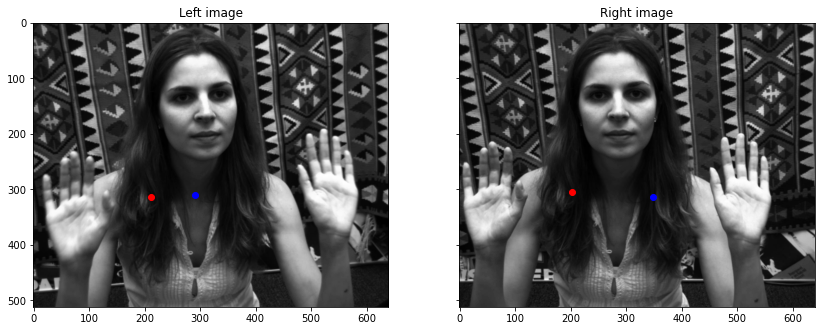

In [23]:
imL = cv2.imread('Left.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('Right.tif', cv2.IMREAD_GRAYSCALE)
    
plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

ax1.imshow(imL, cmap='gray'), ax1.set_title('Left image'), ax1.scatter(pL[0], pL[1], color='r'), \
    ax1.scatter(qL[0],qL[1], color = 'b')
ax2.imshow(imR, cmap='gray'), ax2.set_title('Right image'), ax2.scatter(pR[0], pR[1], color = 'r'), \
    ax2.scatter(qR[0],qR[1], color = 'b')

**<span style="color:blue"> Answer Question:**\
Look at the projection of each of the points in the two images. One pair looks as expected, and the other does not. Please give a short explanation of what may have caused it.

**<span style="color:blue">Your answer:**\
The blue point, Q, seems not to be projected correctly, unlike point P, which is projected correctly between the two images. This discrepancy may be caused by the actual 3D point in the world being obscured by the woman in the image (in both images), leading to a misleading conclusion about the projection's accuracy. In reality,  Q is located somewhere in the background, between the woman and the carpet in the background. 
    
    

## <span style="color:blue"> Part B: Epipolar Geometry
Compute the fundamental matrix F and the epipoles eL and eR of the left and right images, using their projection matrices.\
Note, you should normalize F by F(3,3) for improved precision.

For the epipoles' computation use the MR and ML and the Center of projections.

**<span style="color:blue">Answer Question:**
Can you double check if they are correct using F? If so, check it.


**<span style="color:blue">Your answer:**
    
    
    

In [24]:
def skew_symmetric_matrix(a):
    """
    Create a skew-symmetric matrix [a]_x from a 3-dimensional vector a.

    Parameters:
    - a (numpy.ndarray): A 3-dimensional vector.

    Returns:
    - numpy.ndarray: The 3x3 skew-symmetric matrix derived from vector a.
    """
    return np.array([
        [0, -a[2], a[1]],
        [a[2], 0, -a[0]],
        [-a[1], a[0], 0]
    ])

In [25]:
import numpy as np

def compute_F(eR, MR, ML):
    """
    Compute the fundamental matrix F given an the right epipole eR, 
    right projection matrix MR, and left projection matrix ML.
    
    Parameters:
    - eR (numpy.ndarray): The right epipole.
    - MR (numpy.ndarray): The right camera projection matrix, typically of shape (3, 4).
    - ML (numpy.ndarray): The left camera projection matrix, typically of shape (3, 4).
    
    Returns:
    - numpy.ndarray: The computed fundamental matrix F, of shape (3, 3).
    
    """
    
    # Flatten eR
    eR_flatten = eR.flatten()

    # Pseudo Inverse of the left projection matrix
    ML_P = np.linalg.pinv(ML)

    # Compute F using the pseudo inverse and the skew symmetric inverse
    MR_ML_P = MR @ ML_P
    eR_skew = skew_symmetric_matrix(eR_flatten)

    F = eR_skew @ MR_ML_P

    # Normalize F by its (3, 3) element
    F = F / F[2, 2]
    
    return F


In [26]:
# Compute the epipole point using the projection matrices
eL_homogenous = ML @ CR_h
eR_homogenous = MR @ CL_h

eL_euclid = homogenous_to_euclidean(eL_homogenous)
eR_euclid = homogenous_to_euclidean(eR_homogenous)


F = compute_F(eR_homogenous, MR, ML)
print(f"The epipole of the left camera:\n{eL_euclid}\n")
print(f"The epipole of the right camera:\n{eR_euclid}\n")
print(f"The Fundamental matrix F\n{F}\n")

# Check if the points correspond to F is eR.T @ F = 0 or F @ eL = 0

# Perform the checks
check_eR = np.dot(eR_homogenous.T, F)
check_eL = np.dot(F, eL_homogenous)

print(f"Check with eR.T @ F:\n{check_eR.T}\n")
print(f"Check with F @ eL:\n{check_eL}\n")

The epipole of the left camera:
[[19334.33412498]
 [ 1092.93057043]]

The epipole of the right camera:
[[-13907.99596273]
 [ -1240.26006697]]

The Fundamental matrix F
[[ 0.00000075 -0.0000062  -0.00777248]
 [-0.00000459  0.0000007   0.08796507]
 [ 0.00477065 -0.08530944  1.        ]]

Check with eR.T @ F:
[[ 0.]
 [-0.]
 [ 0.]]

Check with F @ eL:
[[-0.]
 [ 0.]
 [-0.]]



## Epipolar lines ##

Click on three different points of the **right** image, and check if the epipolar lines on the left image pass through a pixel that corresponds to the one you picked in the right image. Output the set of epipolar lines overlayed on the pair of  images as shown below.

To do so you can use:
1. The code below opens the images in a seperate window. You can click on the right image and  capture the click's coordinates by using the function *plt.ginput*.
2. Take each point (this can be done by a loop) and calculate its epipolar line  on the left image using F.
3. Compute the two endpoints of the line in the image to plot it on the left image. \
    **Hint**: you have linear coefficients - (a,b,c). Calculate the y value in the image for x=0, and x=image.width and plot the result.\
    Use: ax2.plot((x0. xWidth),(yx0, yxWidth))
4. Use the set of the points of the right image that you collected, and draw the epipolar lines on the right image.

In [27]:
def calculate_epipolar_line(point, F, right):
    """
    Calculate the epipolar line for a given point using the fundamental matrix F.

    Parameters:
    - point: The point in Euclidean coordinates (x, y).
    - F: The fundamental matrix.
    - right: A boolean flag indicating whether the point is on the right image (True) or left image (False).

    Returns:
    - The epipolar line coefficients (a, b, c) for the equation ax + by + c = 0.
    """
    point_homogenous = euclidean_to_homogenous(np.array(point))
    
    if right:
        epipolar_line = (point_homogenous.T @ F).flatten()
    else:
        epipolar_line = (F @ point_homogenous).flatten()
    
    return epipolar_line

In [28]:
def compute_lines(img, line):
    """
    Compute the two endpoints of a line on the boundaries of an image, given the line's
    equation coefficients. This function does not draw the line on the image but rather
    calculates the endpoints that can be used for drawing.

    The line's equation is ax + by + c = 0, and the endpoints are calculated for the leftmost
    and rightmost edges of the image.

    Parameters:
    - img (numpy.ndarray): The image array. Used to determine the image dimensions.
    - line (list or numpy.ndarray): The coefficients of the line equation [a, b, c].

    Returns:
    - tuple: A tuple containing the x and y coordinates of the start point (x0, y0)
             and the end point (x_width, y_width) of the line.
    """
    height, width = img.shape[:2]  # Extract image dimensions
    
    # Compute y-coordinates for the leftmost and rightmost edges of the image
    x0 = 0
    y0 = int(find_y(line[0], line[1], line[2], x0))
    
    x_width = width - 1  # Rightmost x-coordinate
    y_width = int(find_y(line[0], line[1], line[2], x_width))
    
    return x0, y0, x_width, y_width


In [29]:
def find_y(a, b, c, x):
    """
    Calculate the y-coordinate of a point lying on a line given by its equation coefficients and an x-coordinate.

    The line is represented in its general form, ax + by + c = 0

    Parameters:
    - a (float): The coefficient of x in the line equation.
    - b (float): The coefficient of y in the line equation. It must be non-zero to avoid division by zero.
    - c (float): The constant term in the line equation.
    - x (float): The x-coordinate of the point on the line.

    Returns:
    - float: The y-coordinate of the point on the line corresponding to the given x-coordinate.

    """
    if b == 0:
        raise ZeroDivisionError("Coefficient 'b' must be non-zero to avoid division by zero.")

    y = (-(a * x) - c) / b
    return y



**To demonstrate the calculations without selecting data in real time, we've prepared two scenarios using distinct datasets**

In [30]:
# # The code for choosing data in real time

# # This sould open a new figure window outside of jupyter notebook
# %matplotlib qt  

# imL = cv2.imread('Left.tif', cv2.IMREAD_GRAYSCALE)
# imR = cv2.imread('Right.tif', cv2.IMREAD_GRAYSCALE)
# imL_lines = np.copy(imL)

    
# plt.rcParams['figure.figsize'] = (14.0, 14.0) 
# f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

# ax1.imshow(imL, cmap='gray'), ax1.set_title('Left image')
# ax2.imshow(imR, cmap='gray'), ax2.set_title('Right image')

# data = plt.ginput(3)

# x_val = [x[0] for x in data]
# y_val = [x[1] for x in data]

# ax2.scatter(x_val, y_val, color='r')

# for point in data:
    
#     # Calculate the epipolar line in the left image for a point in the right image
#     epip_line_left = calculate_epipolar_line(point, F, right=True)
#     x0_L, y0_L, x_width_L, y_width_L = compute_lines(imL, epip_line_left)
#     # Plot the epipolar line on the left image
#     ax1.plot((x0_L, x_width_L), (y0_L, y_width_L))
    
#     # Calculate the epipolar line in the right image for a point in the left image
#     correspond_point = (x0_L, y0_L)
#     epip_line_right = calculate_epipolar_line(correspond_point, F, right=False)
#     x0_R, y0_R, x_width_R, y_width_R = compute_lines(imR, epip_line_right)
#     # Plot the epipolar line on the right image
#     ax2.plot((x0_R, x_width_R), (y0_R, y_width_R))
    
#     pass

### This is what you should see:
![Epipolar](epipolarLines1.png "Epipolar Lines example")

In [31]:
# Two datasets after choosing points

data1 = [(287.82442396313365, 167.82117972350238), (455.22718894009233, 265.1483686635945), (282.6336405529954, 433.8488294930875)]
data2 = [(281.335944700461, 60.78073732718906), (505.8373271889401, 200.9318894009217), (274.8474654377882, 413.7540092165899)]

### The first scnario:

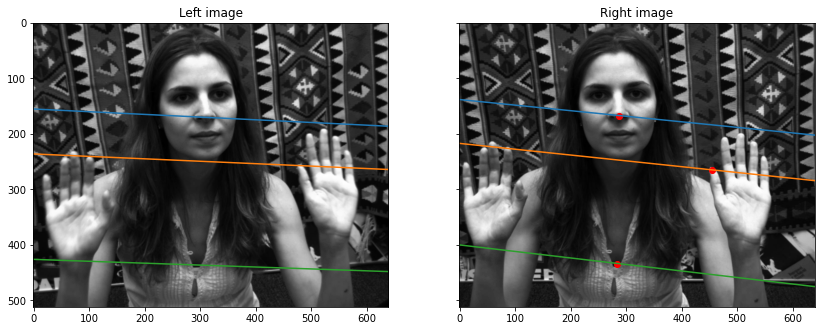

In [32]:
%matplotlib inline

imL = cv2.imread('Left.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('Right.tif', cv2.IMREAD_GRAYSCALE)
    
plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

ax1.imshow(imL, cmap='gray'), ax1.set_title('Left image')
ax2.imshow(imR, cmap='gray'), ax2.set_title('Right image')


x_val = [x[0] for x in data1]
y_val = [x[1] for x in data1]

ax2.scatter(x_val, y_val, color='r')

F = compute_F(eR_homogenous, MR, ML)

for point in data1:
    
    # Calculate the epipolar line in the left image for a point in the right image
    epip_line_left = calculate_epipolar_line(point, F, right=True)
    x0_L, y0_L, x_width_L, y_width_L = compute_lines(imL, epip_line_left)
    # Plot the epipolar line on the left image
    ax1.plot((x0_L, x_width_L), (y0_L, y_width_L))
    
    # Calculate the epipolar line in the right image for a point in the left image
    correspond_point = (x0_L, y0_L)
    epip_line_right = calculate_epipolar_line(correspond_point, F, right=False)
    x0_R, y0_R, x_width_R, y_width_R = compute_lines(imR, epip_line_right)
    # Plot the epipolar line on the right image
    ax2.plot((x0_R, x_width_R), (y0_R, y_width_R))
    
    pass

### The second scnario:

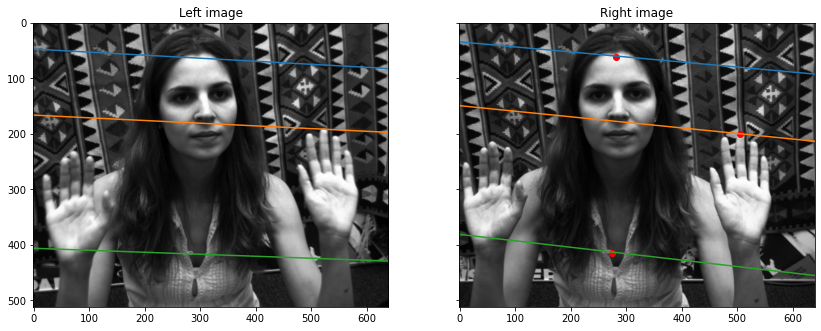

In [33]:
%matplotlib inline

imL = cv2.imread('Left.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('Right.tif', cv2.IMREAD_GRAYSCALE)
    
plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

ax1.imshow(imL, cmap='gray'), ax1.set_title('Left image')
ax2.imshow(imR, cmap='gray'), ax2.set_title('Right image')


x_val = [x[0] for x in data2]
y_val = [x[1] for x in data2]

ax2.scatter(x_val, y_val, color='r')

F = compute_F(eR_homogenous, MR, ML)

for point in data2:
    
    # Calculate the epipolar line in the left image for a point in the right image
    epip_line_left = calculate_epipolar_line(point, F, right=True)
    x0_L, y0_L, x_width_L, y_width_L = compute_lines(imL, epip_line_left)
    # Plot the epipolar line on the left image
    ax1.plot((x0_L, x_width_L), (y0_L, y_width_L))
    
    # Calculate the epipolar line in the right image for a point in the left image
    correspond_point = (x0_L, y0_L)
    epip_line_right = calculate_epipolar_line(correspond_point, F, right=False)
    x0_R, y0_R, x_width_R, y_width_R = compute_lines(imR, epip_line_right)
    # Plot the epipolar line on the right image
    ax2.plot((x0_R, x_width_R), (y0_R, y_width_R))
    
    pass

##  <span style="color:blue">Part C : SIFT and RANSAC/LMedS
**Follow the matching to compute F.**

https://docs.opencv.org/master/da/de9/tutorial_py_epipolar_geometry.html 

The example attached here needs some twicks to make it work. First you need to uninstall the opencv package and to install to opencv-contrib package:
- pip uninstall opencv-python 

Then install the contrib version with this:
- pip install opencv-contrib-python

**<span style="color:red"> Now, you have to use those lines:**
- **sift = cv2.xfeatures2d.SIFT_create()**
- **kp1, des1 = sift.detectAndCompute(img1, None)**


Hereby, we will find the corresponding featues using the SIFT algorithm and match the closet points. The plotted figure showes the best 300 matches.


[ WARN:0@2.840] global shadow_sift.hpp:15 SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


(<matplotlib.image.AxesImage at 0x7f86006ce430>, Text(0.5, 1.0, 'Matches'))

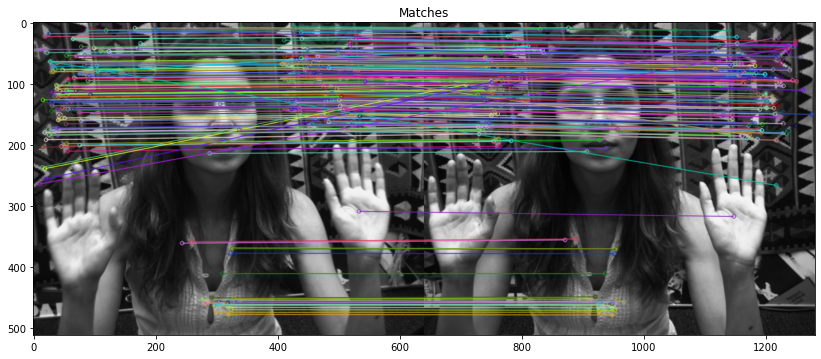

In [34]:
imL = cv2.imread('Left.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('Right.tif', cv2.IMREAD_GRAYSCALE)

# Initiate SIFT detector
# In the link above you need to change the next line from cv.SIFT to cv2.xfeatures2d.
# Instead of: sift = cv2.SIFT() use:
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(imL,None)
kp2, des2 = sift.detectAndCompute(imR,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
# create FlannBasedMatcher object
flann = cv2.FlannBasedMatcher(index_params,search_params)

# Match descriptors.
matches = flann.knnMatch(des1,des2,k=2)

pts1 = []
pts2 = []
matching = []
# Building a list of points screened by ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)
        matching.append(m)
        

# Sort them in the order of their distance.
matching = sorted(matching, key = lambda x:x.distance)
        
# Draw first 300 matches.
img3 = np.array([])
img3 = cv2.drawMatches(imL, kp1, imR, kp2, matching[:300], outImg = img3, flags =2)

plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1)) = plt.subplots(1, 1, sharex='col', sharey='row')
ax1.imshow(img3, cmap='gray'), ax1.set_title('Matches')

<span style="color:blue"> Not for submission:

    Look at the obtain results.

    a. Do you think all matches are correct?
    b. In which regions of the scene, most of the reliable matches were found?
    c. Try the worst 200 mathces as well -- matching[-1-200:]

Now, we will use the found matches to compute **F** using *cv2.findFundamentalMat()*.

In [35]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

# Computing the F matrix
F_calc, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)
# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

In [36]:
print(f"F_calc is \n{F_calc.T}\n")
print(f"F is \n{F}\n")

F_calc is 
[[ 0.00000111 -0.00001382  0.0063966 ]
 [ 0.00000741  0.00000084 -0.06314146]
 [-0.00878218  0.06379676  1.        ]]

F is 
[[ 0.00000075 -0.0000062  -0.00777248]
 [-0.00000459  0.0000007   0.08796507]
 [ 0.00477065 -0.08530944  1.        ]]



And now lets check the computed F_calc:
1. Use it to draw the epipolar line as in the example above (change F to F_calc.T)
2. Compute the distance between the computed epipoles by F and by F_calc in each of the images.

Hint: You can use scipy.linalg import null_space 

**We chose the points out of Data1 scenario, both for f and f_calc and drew the epipolar lines**

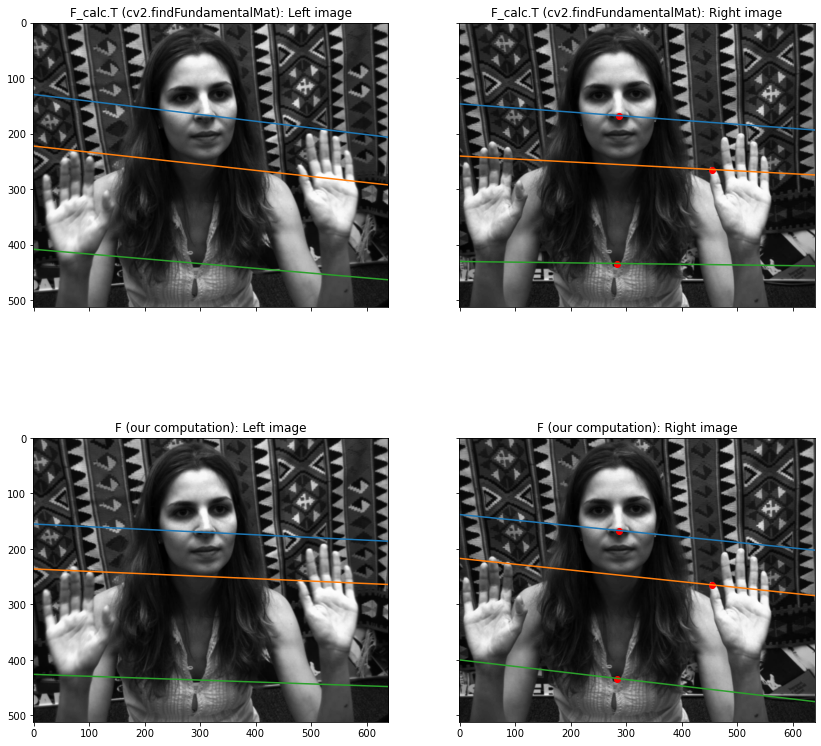

In [37]:
%matplotlib inline

imL = cv2.imread('Left.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('Right.tif', cv2.IMREAD_GRAYSCALE)
imL_lines = np.copy(imL)

    
# Set the figure size for better visibility
plt.rcParams['figure.figsize'] = (14.0, 14.0)
# Create a 2x2 subplot layout
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')


ax1.imshow(imL, cmap='gray'), ax1.set_title('F_calc.T (cv2.findFundamentalMat): Left image')
ax2.imshow(imR, cmap='gray'), ax2.set_title('F_calc.T (cv2.findFundamentalMat): Right image')
ax3.imshow(imL, cmap='gray'), ax3.set_title('F (our computation): Left image')
ax4.imshow(imR, cmap='gray'), ax4.set_title('F (our computation): Right image')


x_val = [x[0] for x in data1]
y_val = [x[1] for x in data1]

ax2.scatter(x_val, y_val, color='r')
ax4.scatter(x_val, y_val, color='r')


F = compute_F(eR_homogenous, MR, ML)

for point in data1:
    
    # F_calc.T calculations
    
    # Calculate the epipolar line in the left image for a point in the right image
    epip_line_left = calculate_epipolar_line(point, F_calc.T, right=True)
    x0_L, y0_L, x_width_L, y_width_L = compute_lines(imL, epip_line_left)
    # Plot the epipolar line on the left image
    ax1.plot((x0_L, x_width_L), (y0_L, y_width_L))
    
    # Calculate the epipolar line in the right image for a point in the left image
    correspond_point = (x0_L, y0_L)
    epip_line_right = calculate_epipolar_line(correspond_point, F_calc.T, right=False)
    x0_R, y0_R, x_width_R, y_width_R = compute_lines(imR, epip_line_right)
    # Plot the epipolar line on the right image
    ax2.plot((x0_R, x_width_R), (y0_R, y_width_R))
    
    # F calculations
    
    # Calculate the epipolar line in the left image for a point in the right image
    epip_line_left2 = calculate_epipolar_line(point, F, right=True)
    x0_L2, y0_L2, x_width_L2, y_width_L2 = compute_lines(imL, epip_line_left2)
    # Plot the epipolar line on the left image
    ax3.plot((x0_L2, x_width_L2), (y0_L2, y_width_L2))
    
    # Calculate the epipolar line in the right image for a point in the left image
    correspond_point = (x0_L2, y0_L2)
    epip_line_right2 = calculate_epipolar_line(correspond_point, F, right=False)
    x0_R2, y0_R2, x_width_R2, y_width_R2 = compute_lines(imR, epip_line_right2)
    # Plot the epipolar line on the right image
    ax4.plot((x0_R2, x_width_R2), (y0_R2, y_width_R2))
    
    pass

2. Compute the distance between the computed epipoles by F and by F_calc in each of the images.

In [38]:
from scipy.linalg import null_space

# Compute epipoles in homogeneous coordinates - Reminder
eL_F = ML @ CR_h  # Epipole in left image from F
eR_F = MR @ CL_h  # Epipole in right image from F

# Convert to Euclidean coordinates
eL_F = homogenous_to_euclidean(eL_F)
eR_F = homogenous_to_euclidean(eR_F)

# Compute null spaces for eL_Fcalc and eR_Fcalc from F_calc
eL_Fcalc_hom = null_space(F_calc)
eR_Fcalc_hom = null_space(F_calc.T)

# Correct conversion to Euclidean coordinates
eL_Fcalc = homogenous_to_euclidean(eL_Fcalc_hom)
eR_Fcalc = homogenous_to_euclidean(eR_Fcalc_hom)

# Compute Euclidean distances
Distance_eL = np.linalg.norm(eL_F - eL_Fcalc)
Distance_eR = np.linalg.norm(eR_F - eR_Fcalc)

print(f'Distance between the epipoles in the left image - eL_F and eL_Fcalc: {Distance_eL:.3f}')
print(f'Distance between the epipoles in the right image - eR_F and eR_Fcalc: {Distance_eR:.3f}')


Distance between the epipoles in the left image - eL_F and eL_Fcalc: 14702.708
Distance between the epipoles in the right image - eR_F and eR_Fcalc: 22424.714


**<span style="color:blue">Answer Question:**\
    Do you see any differences?
    
**<span style="color:blue">Your answer:**

The differences in distances between the left epipole computed from *F* and *F_calc* versus the right epipole computed from the same matrices can be related to **different Sensitivities in the Stereo Setup:** The positions of the epipoles are influenced by the relative orientation and translation of the two cameras. Changes or inaccuracies in the estimation of *F* and *F_calc* might affect the left and right epipoles differently based on how these changes map to the geometry of the camera setup. For instance, a slight rotation or translation difference between the camera pairs can have a more pronounced effect on one epipole's calculated position than on the other.

Furthere more, The left and right epipoles are found from the null spaces of *F.T* and *F*. The numerical properties of these null spaces, such as their sensitivity to changes in *F* can differ. This means that even small variations between *F* and *F_calc might lead to relatively larger changes in one epipole's position compared to the other.

### <span style="color:blue"> Your part in this section :) ###

#### Take two images by your camera and compute the epipolar geometry using LMedS ####

Please submit: 5 corresponding epipolar lines overlayed on   your pair of images.

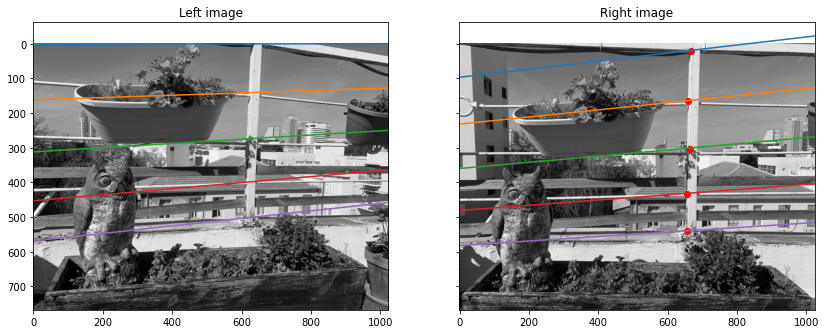

In [39]:
%matplotlib inline


imL = cv2.imread('left_self_image.jpeg', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('right_self_image.jpeg', cv2.IMREAD_GRAYSCALE)

# Initialize a feature detector, e.g., SIFT
sift = cv2.SIFT_create()

# Detect and compute the features and descriptors
kp1, des1 = sift.detectAndCompute(imL, None)
kp2, des2 = sift.detectAndCompute(imR, None)


# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
# create FlannBasedMatcher object
flann = cv2.FlannBasedMatcher(index_params,search_params)

# Match descriptors.
matches = flann.knnMatch(des1,des2,k=2)

# Apply ratio test to filter matches
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)

# Extract coordinates of the good matches
pts1 = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

# Estimate the fundamental matrix using LMEDS
F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_LMEDS)


plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

ax1.imshow(imL, cmap='gray'), ax1.set_title('Left image')
ax2.imshow(imR, cmap='gray'), ax2.set_title('Right image')

data = [(668.4504147465443, 20.041345622119707), (658.0688479262678, 165.3832811059906), (664.2977880184337, 302.4199631336404), (655.9925345622125, 433.2277050691242), (655.9925345622125, 541.1959999999998)]


x_val = [x[0] for x in data]
y_val = [x[1] for x in data]

ax2.scatter(x_val, y_val, color='r')

for point in data:
    
    # Calculate the epipolar line in the left image for a point in the right image
    epip_line_left = calculate_epipolar_line(point, F, right=True)
    x0_L, y0_L, x_width_L, y_width_L = compute_lines(imL, epip_line_left)
    # Plot the epipolar line on the left image
    ax1.plot((x0_L, x_width_L), (y0_L, y_width_L))
    
    # Calculate the epipolar line in the right image for a point in the left image
    correspond_point = (x0_L, y0_L)
    epip_line_right = calculate_epipolar_line(correspond_point, F, right=False)
    x0_R, y0_R, x_width_R, y_width_R = compute_lines(imR, epip_line_right)
    # Plot the epipolar line on the right image
    ax2.plot((x0_R, x_width_R), (y0_R, y_width_R))
    
    pass

##  <span style="color:blue"> Part D: Answer the following question
    
Consider two rectified images that are related by translation along the $y$-axis.

1. What is the epipolar line on the bottom image for the point $(x, y)$ on the top image?
2. What is the Fundamental matrix of the pair of images? Explain your answer and prove that it is consistent with your answer to (1).
3. Where is the epipole of the top image? Prove your answer formally using your answer to (2).
    
    


**<span style="color:blue"> Answer:**

1. Assuming that the focal length is not 0, the epipolar line for the point $(x,y)$ is a vertical line along the top image. The x value is according to the paramters of both images.
    
2. Assuming that the world coordinate system is the bottom image. 
Assume W.L.O.G that the intrinsic paramters of the both images are: 
    
$$ s_{xT}, s_{yT}, s_{xB}, s_{yB} = 1 $$ 
$$ o_{xT}, o_{yT}, o_{xB}, o_{yB} = 0 $$
$$ f_B, f_T = 1 $$
    
Let $M_T$ be the projection of the top image.
W.L.O.G assume that the translation is by 1:    
$$R_T=I_3, T=(0,T_y,0)^T=(0,1,0)$$ 
$$M_T=M_{int}[I_3|-I_3T]=M_{int}[I_3|-T]^*=
\begin{pmatrix}
s_{xT} & 0 & o_{xT} & 0 \\
0 & s_{yT} & o_{yT} & 0 \\
0 & 0 & 1 & 0
\end{pmatrix}
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & -T_y \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix} = 
\begin{pmatrix}
s_{xT} & 0 & o_{xT} & 0 \\
0 & s_{yT} & o_{yT} & -T_y \cdot s_{yT} \\
0 & 0 & 1 & 0
\end{pmatrix} = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & -1 \cdot 1 \\
0 & 0 & 1 & 0
\end{pmatrix} = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & -1  \\
0 & 0 & 1 & 0
\end{pmatrix}
$$

$$R_B=I_3, T_B=(0,0,0)^T$$ 
$$M_B=M_{int}[I_3|-I_30]=M_{int}[I_3|-0]^*=
\begin{pmatrix}
s_{xB} & 0 & o_{xB} & 0 \\
0 & s_{yB} & o_{yB} & 0 \\
0 & 0 & 1 & 0
\end{pmatrix}
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix} = 
\begin{pmatrix}
s_{xB} & 0 & o_{xB} & 0 \\
0 & s_{yB} & o_{yB} & 0 \\
0 & 0 & 1 & 0
\end{pmatrix}=
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0
\end{pmatrix}
$$
 
$$M_B^+= M_B^T(M_BM_B^T)^{-1}=
\begin{pmatrix}
\frac{1}{s_{xB}} & 0 & -\frac{o_{xB}}{s_{xB}} \\
0 & \frac{1}{s_{yB}} & -\frac{o_{yB}}{s_{yB}}  \\
0 & 0 & 1 \\
0 & 0 & 0
\end{pmatrix} =
\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0  \\
0 & 0 & 1 \\
0 & 0 & 0
\end{pmatrix}
$$
 
$^*$ - vstack with (0,0,0,1)    
The bottom image is the world coordinate system, thus $ C_B=(0,0,0)^T $ and $ \tilde{C_B} = (0,0,0,1)^T $ where $\tilde{e_T} = M_t \tilde{C_B} $ $$ \tilde{e_T} =
\begin{pmatrix}
s_{xT} & 0 & o_{xT} & 0 \\
0 & s_{yT} & o_{yT} & -T_y \cdot s_{yT} \\
0 & 0 & 1 & 0
\end{pmatrix} \begin{pmatrix}0 \\ 0 \\ 0 \\ 1\end{pmatrix} = (0,-T_y\cdot s_{yT},0) = (0,-1,0)$$
$$[e_T]_{\times}=
\begin{pmatrix}
0 & 0 & -T_y\cdot s_{yT}  \\
0 & 0 & 0   \\
T_y\cdot s_y & 0  & 0
\end{pmatrix} = 
\begin{pmatrix}
0 & 0 & -1  \\
0 & 0 & 0   \\
1 & 0  & 0
\end{pmatrix}
$$
    
$$F = [e_T]_{\times}M_TM_B^+= \begin{pmatrix}
0 & 0 & -T_y\cdot s_{yT}  \\
0 & 0 & 0   \\
T_y\cdot s_{yT} & 0  & 0
\end{pmatrix}
\begin{pmatrix}
s_{xT} & 0 & o_{xT} & 0 \\
0 & s_{yT} & o_{yT} & -T_y \cdot s_{yT} \\
0 & 0 & 1 & 0
\end{pmatrix}
\begin{pmatrix}
\frac{1}{s_{xB}} & 0 & -\frac{o_{xB}}{s_{xB}} \\
0 & \frac{1}{s_{yB}} & -\frac{o_{yB}}{s_{yB}}  \\
0 & 0 & 1 \\
0 & 0 & 0
\end{pmatrix}
= 
\begin{pmatrix}
0 & 0 & -1  \\
0 & 0 & 0   \\
1 & 0  & 0
\end{pmatrix} 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & -1  \\
0 & 0 & 1 & 0
\end{pmatrix}
\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0  \\
0 & 0 & 1 \\
0 & 0 & 0
\end{pmatrix}
=
\begin{pmatrix}
0 & 0 & -1  \\
0 & 0 & 0   \\
1 & 0  & 0
\end{pmatrix} 
\begin{pmatrix}
1 & 0 & 0  \\
0 & 1 & 0   \\
0 & 0 & 1
\end{pmatrix} =
\begin{pmatrix}
0 & 0 & -1  \\
0 & 0 & 0   \\
1 & 0  & 0
\end{pmatrix}
$$
    
Now, if there is any scaling or different translation, focal length, then you can adjust it by the value in $F_{02}, F_{2,0}$    
    
$$\tilde{p}=(x,y,1)^T$$ 
    
$$\tilde{l}_T=F\tilde{p}=\begin{pmatrix}
0 & 0 & -1  \\
0 & 0 & 0   \\
1 & 0  & 0
\end{pmatrix}(x,y,1)^T
=(-x, 0, 1) \rightarrow l_R$$

Now we can adjust the principal point (we assumed it is $(0,0)$), and after translating the epipoplar line to euclidean geometry we get: 
$$u=\{p|-xp_x + 0p_y + c \}$$
$$-xp_x + 0p_y + c = -xp_x + 0 + c = 0 \rightarrow  p_x=\frac{c}{x}
$$ Where $x$ is a given value of the point in the bottom image, thus We got a represnation of a verical line! 
    
    
3. The epipole of the top image is defined as the point of intersection between the line connecting the Centers of Projection (COP) of both images and the top image plane. However, we are given a set of images that are translated along the y-axis. This means that the line connecting the COPs is a vertical line (relative to the translation) and parallel to the image plane. As we know, parallel lines (in this case, a line and a plane) meet only at infinity (or never meet, if we consider infinity as undefined).Formaly:
    
We saw that in the projective space: 
$$ \tilde{e_T} =
\begin{pmatrix}
s_{xT} & 0 & o_{xT} & 0 \\
0 & s_{yT} & o_{yT} & -T_y \cdot s_{yT} \\
0 & 0 & 1 & 0
\end{pmatrix} \begin{pmatrix}0 \\ 0 \\ 0 \\ 1\end{pmatrix} = (0,-T_y\cdot s_{yT},0) = (0,-1,0)$$
    
    
To find the point in the image space, we need to convert it to Euclidean coordinates. However, the point is not defined in Euclidean space because we need to divide by the third coordinate $(c)$, which is 0! Thus, we can conclude that the epipole of the top image is not defined (or exists at infinity).
  